In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

from src import *

import math
import torch
import torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

from tqdm.notebook import tqdm
from easydict import EasyDict
from IPython.display import HTML

device = torch.device(f'cuda:0' if torch.cuda.is_available() else 'cpu')

In [47]:
def optimize(views, events_start_time, events_end_time, e_p_s, energy, is_rear=True, window_len=.5):
    
    if is_rear:
        mask = views == 'rear'
        subset = events_start_time[mask] * e_p_s
    else:
        mask = views != 'rear'
        subset = events_end_time[mask] * e_p_s

    window_len = window_len * e_p_s

    delta_best = None
    sum_of_energies_best = 0

    deltas = np.arange(0, 5.1, 0.1)

    for delta in deltas:
        delta = delta * e_p_s

        if is_rear:
            window_from = subset - delta - window_len
        else:
            window_from = subset + delta - window_len
        window_from = np.clip(window_from, 0, len(energy)).astype(int)

        if is_rear:
            window_till = subset - delta + window_len
        else:
            window_till = subset + delta + window_len
        window_till = np.clip(window_till, 0, len(energy)).astype(int)

        sum_of_energies = 0

        for i, j in zip(window_from, window_till):
            sum_of_energies += energy[i: j].sum().item()

        if sum_of_energies > sum_of_energies_best:
            sum_of_energies_best = sum_of_energies
            delta_best = delta + window_len / 2

    return delta_best / e_p_s

In [30]:
def create_labels(file):
    signal = load_audio(f'data/audio/{file}.MP4.wav')
    signal_length = int(len(signal) / 44100)

    csv = load_csv(f'{file}.MP4')
    views = load_views_from_csv(csv)
    events_start_time, events_end_time = load_event_time_from_csv(csv)

    params = EasyDict()
    params.n_fft = 1024
    params.n_mels = 64
    params.hop_length = 128
    params.sr = 44100

    s = torch.stft(signal, n_fft=params.n_fft, hop_length=params.hop_length)
    energy = s[..., 0].pow(2)
    energy = energy.sum(0)

    e_p_s = len(energy) / signal_length
    
    mask = views == 'rear'
    output_rear = optimize(views, events_start_time, events_end_time, e_p_s, energy, is_rear=True)
    estimated_labels_1 = events_start_time[mask] - output_rear

    mask = views != 'rear'
    output_front = optimize(views, events_start_time, events_end_time, e_p_s, energy, is_rear=False)
    estimated_labels_2 = events_end_time[mask] + output_front
    
    print(f'{file}: {output_rear:.2f}, {output_front:.2f}')
    
    
    estimated_labels = np.concatenate([estimated_labels_1, estimated_labels_2])
    estimated_labels.sort()
    estimated_labels = np.clip(estimated_labels, 0, signal_length)
    estimated_labels = np.round(estimated_labels, 2)
    estimated_labels.tolist()
    
    np.savetxt(f'data/labels/{file}.MP4.txt', estimated_labels, fmt='%s')

In [19]:
file = '20190819-Kutna Hora-L4-out-MVI_0040'

In [48]:
file = '20190819-Kutna Hora-L4-out-MVI_0040'
signal = load_audio(f'data/audio/{file}.MP4.wav')
signal_length = int(len(signal) / 44100)

csv = load_csv(f'{file}.MP4')
views = load_views_from_csv(csv)
events_start_time, events_end_time = load_event_time_from_csv(csv)

n_fft = 1024
hop_length = 128

s = torch.stft(signal, n_fft=n_fft, hop_length=hop_length)
energy = s[..., 0].pow(2)
energy = energy.sum(0)

e_p_s = len(energy) / signal_length

mask = views == 'rear'
output_rear = optimize(views, events_start_time, events_end_time, e_p_s, energy, is_rear=True)

mask = views != 'rear'
output_front = optimize(views, events_start_time, events_end_time, e_p_s, energy, is_rear=False)

In [49]:
output_rear, output_front

(1.6500000000000001, 0.8500000000000001)

In [35]:
output_rear, output_front

(1.4000000000000001, 0.6000000000000001)

In [ ]:
from_time = 2 * 60 + 30
till_time = 3 * 60 + 30


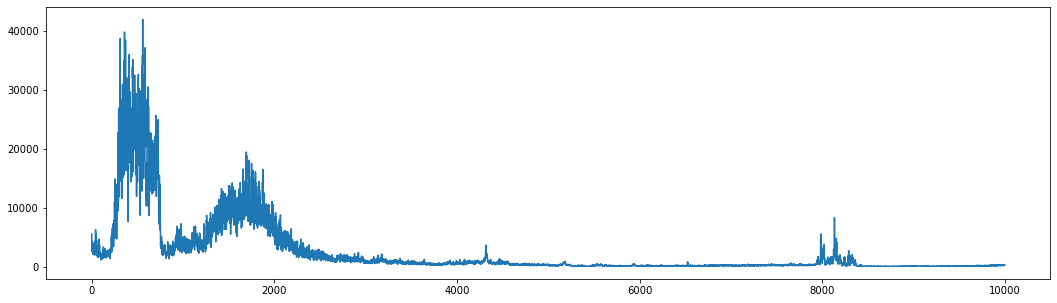

In [43]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18,5))
plt.plot(energy[:10000]);

In [7]:
files = [
    '20190819-Kutna Hora-L1-out-MVI_0007',
    '20190819-Kutna Hora-L3-in-MVI_0005',
    '20190819-Kutna Hora-L3-out-MVI_0008',
    '20190819-Kutna Hora-L4-in-MVI_0013',
    '20190819-Kutna Hora-L5-in-MVI_0003',
    '20190819-Kutna Hora-L6-out-MVI_0017',
    '20190819-Kutna Hora-L7-out-MVI_0032',
    '20190819-Kutna Hora-L8-in-MVI_0045',
    '20190819-Kutna Hora-L9-in-MVI_0043',
    '20190819-Kutna Hora-L10-in-MVI_0029',
    '20190819-Kutna Hora-L10-out-SDV_1888',
    '20190819-Kutna Hora-L13-in-MVI_0006',
    '20190819-Kutna Hora-L13-out-MVI_0018',
    '20190819-Kutna Hora-L14-in-SDV_0012',
    '20190819-Kutna Hora-L14-out-MVI_0005',
    '20190819-Kutna Hora-L15-out-MVI_0012',
    '20190819-Kutna Hora-L16-out-MVI_0003',
    '20190819-Kutna Hora-L18-in-MVI_0030',
    '20190819-Kutna Hora-L18-out-MVI_0045',
    '20190819-Ricany-L2-in-MVI_0006',
    '20190819-Ricany-L2-out-MVI_0005',
    '20190819-Ricany-L3-in-MVI_0006',
    '20190819-Ricany-L3-out-MVI_0014',
    '20190819-Ricany-L6-in-MVI_0008',
    '20190819-Ricany-L6-out-MVI_0011',
    '20190819-Ricany-L7-in-MVI_0008',
    '20190819-Ricany-L7-out-MVI_0013',
    '20190819-Ricany-L8-in-MVI_0009',
    '20190819-Ricany-L8-out-MVI_0013',
    '20190819-Ricany-L9-in-MVI_0008',
    '20190819-Ricany-L9-out-MVI_0011',
    '20190819-Kutna Hora-L2-in-MVI_0030',
    '20190819-Kutna Hora-L16-in-MVI_0038',
    '20190819-Ricany-L5-out-MVI_0008',
    '20190819-Kutna Hora-L17-in-MVI_0036',
    '20190819-Ricany-L5-in-MVI_0007',
    '20190819-Kutna Hora-L17-out-MVI_0040',
    '20190819-Ricany-L1-in-MVI_0006',
    '20190819-Kutna Hora-L11-in-MVI_0002',
    '20190819-Ricany-L1-out-MVI_0009',
    '20190819-Ricany-L4-in-MVI_0007',
    '20190819-Ricany-L4-out-MVI_0012',
    '20190819-Kutna Hora-L4-out-MVI_0040'
]

In [8]:
for file in files:
    create_labels(file)

20190819-Kutna Hora-L1-out-MVI_0007: 5.00, 3.00
20190819-Kutna Hora-L3-in-MVI_0005: 2.90, 1.40
20190819-Kutna Hora-L3-out-MVI_0008: 0.80, 0.10
20190819-Kutna Hora-L4-in-MVI_0013: 1.60, 0.60
20190819-Kutna Hora-L5-in-MVI_0003: 0.20, 0.40
20190819-Kutna Hora-L6-out-MVI_0017: 5.00, 3.20
20190819-Kutna Hora-L7-out-MVI_0032: 3.00, 2.20
20190819-Kutna Hora-L8-in-MVI_0045: 4.20, 2.10
20190819-Kutna Hora-L9-in-MVI_0043: 3.70, 1.80
20190819-Kutna Hora-L10-in-MVI_0029: 3.00, 1.00
20190819-Kutna Hora-L10-out-SDV_1888: 5.00, 2.50
20190819-Kutna Hora-L13-in-MVI_0006: 1.00, 0.30
20190819-Kutna Hora-L13-out-MVI_0018: 1.20, 0.40
20190819-Kutna Hora-L14-in-SDV_0012: 3.50, 1.20
20190819-Kutna Hora-L14-out-MVI_0005: 2.90, 1.10
20190819-Kutna Hora-L15-out-MVI_0012: 0.90, 0.60
20190819-Kutna Hora-L16-out-MVI_0003: 2.70, 1.20
20190819-Kutna Hora-L18-in-MVI_0030: 5.00, 2.80
20190819-Kutna Hora-L18-out-MVI_0045: 1.90, 0.80
20190819-Ricany-L2-in-MVI_0006: 4.90, 1.80
20190819-Ricany-L2-out-MVI_0005: 5.00, 2.30


In [29]:
from collections import defaultdict, Counter

In [51]:
for file in files:
    print(file)

    csv = load_csv(f'{file}.MP4')
    
    licence_plates = defaultdict(list)
    
    for row in csv:
        plate_id = row[1]
        start_time = row[8]
        end_time = row[9]
        if start_time != '':
            licence_plates[plate_id].append(
                [time_to_sec(start_time), row]
            )
        if end_time != '':
            licence_plates[plate_id].append(
                [time_to_sec(end_time), row]
            )
    
    tracking_uuid = 0
    rows = []
    for key, values in licence_plates.items():
        car_times = np.array([t[0] for t in values])
        car_rows = np.array([t[1] for t in values])

        indices = np.argsort(car_times)
        car_times = car_times[indices]
        car_rows = car_rows[indices]
        
        clusters = find_clusters(car_times)
    
        for cluster_id, cluster_objects in clusters.items():
            traking_rows = np.array(car_rows[cluster_objects])
        
            start_time_column_id = 8
            end_time_column_id = 9
            best_detection_frame_time_column_id = 14
            views_column_id = 23
            
            most_common_view = Counter(item for item in traking_rows[:, views_column_id]).most_common(1)[0][0]
            
            modified_row = np.full_like(traking_rows[0], '')
            
            start_times = traking_rows[:, start_time_column_id]
            end_times = traking_rows[:, end_time_column_id]
            best_detection_frame_times = traking_rows[:, best_detection_frame_time_column_id]
            
            times = np.concatenate([start_times, end_times])
            times = np.sort(times)
            times = [t for t in times if t != '']
            
            modified_row[0] = tracking_uuid
            modified_row[1] = key
            tracking_uuid += 1
            modified_row[best_detection_frame_time_column_id] = best_detection_frame_times[-1]
            modified_row[start_time_column_id] = times[0]
            modified_row[end_time_column_id] = times[-1]
            modified_row[views_column_id] = most_common_view

        return rows

20190819-Kutna Hora-L1-out-MVI_0007
['0' '4A19911' '' '' '' '' '' '' '00:00:00.000' '00:00:02.280' '' '' '' ''
 '00:00:00.480' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '2SX0429' '' '' '' '' '' '' '00:00:04.160' '00:00:10.000' '' '' '' ''
 '00:00:04.480' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '7AJ9789' '' '' '' '' '' '' '00:00:00.000' '00:00:01.400' '' '' '' ''
 '00:00:00.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['3' '3SJ2344' '' '' '' '' '' '' '00:00:10.040' '00:00:17.360' '' '' '' ''
 '00:00:10.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '5L04875' '' '' '' '' '' '' '00:00:32.480' '00:00:39.360' '' '' '' ''
 '00:00:33.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '7S44463' '' '' '' '' '' '' '00:00:43.960' '00:00:49.440' '' '' '' ''
 '00:00:50.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['6' '7S44463' '' '' '' '' '' '' '00:18:09.280' '00:18:13.600' '' '' '' ''
 '00:18:09.520' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['7' '4SJ1098' '' '

['0' '4E88474' '' '' '' '' '' '' '00:00:04.480' '00:00:09.400' '' '' '' ''
 '00:00:04.920' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '7AJ8722' '' '' '' '' '' '' '00:00:07.240' '00:00:11.360' '' '' '' ''
 '00:00:07.520' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '1BP7943' '' '' '' '' '' '' '00:00:11.200' '00:00:16.960' '' '' '' ''
 '00:00:13.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '6AN6043' '' '' '' '' '' '' '00:00:16.640' '00:00:23.600' '' '' '' ''
 '00:00:17.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['4' '6AN6043' '' '' '' '' '' '' '00:27:37.480' '00:27:39.440' '' '' '' ''
 '00:27:37.720' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '1SE7872' '' '' '' '' '' '' '00:00:26.680' '00:00:29.880' '' '' '' ''
 '00:00:27.120' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['6' '1SE7872' '' '' '' '' '' '' '00:22:10.440' '00:22:16.480' '' '' '' ''
 '00:22:11.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '4SH9893' '' '' '' '' '' '' '00:00:50.520' '00:00:54

['47' '3S58379' '' '' '' '' '' '' '00:05:09.120' '00:05:09.880' '' '' ''
 '' '00:05:09.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['48' '5AF3962' '' '' '' '' '' '' '00:06:12.040' '00:06:13.360' '' '' ''
 '' '00:06:12.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['49' '7C41607' '' '' '' '' '' '' '00:06:25.800' '00:06:26.880' '' '' ''
 '' '00:06:26.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['50' '3E58788' '' '' '' '' '' '' '00:06:30.240' '00:06:31.280' '' '' ''
 '' '00:06:30.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['51' '5J07644' '' '' '' '' '' '' '00:06:37.440' '00:06:38.160' '' '' ''
 '' '00:06:37.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['52' '3SV8492' '' '' '' '' '' '' '00:07:20.280' '00:07:21.760' '' '' ''
 '' '00:07:20.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['53' '3SK4851' '' '' '' '' '' '' '00:07:33.440' '00:07:34.440' '' '' ''
 '' '00:07:33.840' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['54' '3SU4431' '' '' '' '' '' '' '00:07

['0' '4A20891' '' '' '' '' '' '' '00:00:01.320' '00:00:04.040' '' '' '' ''
 '00:00:01.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '4SC2401' '' '' '' '' '' '' '00:00:45.520' '00:00:49.160' '' '' '' ''
 '00:00:46.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '1SR8374' '' '' '' '' '' '' '00:00:48.200' '00:00:51.440' '' '' '' ''
 '00:00:48.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '8S42247' '' '' '' '' '' '' '00:02:08.200' '00:02:11.040' '' '' '' ''
 '00:02:08.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '3SF0769' '' '' '' '' '' '' '00:04:40.880' '00:04:44.080' '' '' '' ''
 '00:04:41.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '1AI2631' '' '' '' '' '' '' '00:05:12.640' '00:05:16.480' '' '' '' ''
 '00:05:13.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '7S10539' '' '' '' '' '' '' '00:07:19.120' '00:07:23.440' '' '' '' ''
 '00:07:19.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '4SJ0660' '' '' '' '' '' '' '00:07:3

['9' '9S84218' '' '' '' '' '' '' '00:01:15.920' '00:01:17.600' '' '' '' ''
 '00:01:18.000' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['10' '7U13016' '' '' '' '' '' '' '00:01:52.480' '00:01:59.800' '' '' ''
 '' '00:01:54.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['11' '5AA4917' '' '' '' '' '' '' '00:01:58.760' '00:02:00.200' '' '' ''
 '' '00:02:00.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['12' '2SA6795' '' '' '' '' '' '' '00:02:10.640' '00:02:20.320' '' '' ''
 '' '00:02:13.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['13' '2SA6795' '' '' '' '' '' '' '00:27:06.600' '00:27:12.560' '' '' ''
 '' '00:27:06.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['14' '2SA6701' '' '' '' '' '' '' '00:02:29.640' '00:02:35.160' '' '' ''
 '' '00:02:29.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['15' '6S71850' '' '' '' '' '' '' '00:02:38.360' '00:02:45.360' '' '' ''
 '' '00:02:38.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['16' '2SK3428' '' '' '' '' '' '' '00:02:42.920' '00

['0' '1SE7282' '' '' '' '' '' '' '00:00:00.000' '00:00:00.160' '' '' '' ''
 '00:00:00.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '4E70394' '' '' '' '' '' '' '00:00:21.140' '00:00:24.260' '' '' '' ''
 '00:00:21.840' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '5AH0915' '' '' '' '' '' '' '00:00:23.840' '00:00:26.320' '' '' '' ''
 '00:00:24.340' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '3AR9195' '' '' '' '' '' '' '00:00:30.720' '00:00:30.880' '' '' '' ''
 '00:00:30.720' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['4' '3AR9195' '' '' '' '' '' '' '00:06:12.860' '00:06:16.440' '' '' '' ''
 '00:06:13.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '2U78457' '' '' '' '' '' '' '00:00:37.180' '00:00:41.240' '' '' '' ''
 '00:00:38.220' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '5S33983' '' '' '' '' '' '' '00:00:37.340' '00:00:37.860' '' '' '' ''
 '00:00:37.340' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['7' '5S33983' '' '' '' '' '' '' '00:47:50.960' '00

['0' '1SR2962' '' '' '' '' '' '' '00:00:01.560' '00:00:04.900' '' '' '' ''
 '00:00:02.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '3SN0357' '' '' '' '' '' '' '00:00:02.900' '00:00:05.840' '' '' '' ''
 '00:00:03.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['2' '3SN0357' '' '' '' '' '' '' '00:23:43.920' '00:23:45.100' '' '' '' ''
 '00:23:44.340' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '3SC0814' '' '' '' '' '' '' '00:00:06.200' '00:00:08.260' '' '' '' ''
 '00:00:06.980' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['4' '3SC0814' '' '' '' '' '' '' '00:53:46.720' '00:53:50.480' '' '' '' ''
 '00:53:47.640' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '4AT3984' '' '' '' '' '' '' '00:00:08.820' '00:00:10.980' '' '' '' ''
 '00:00:09.660' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '3SY3316' '' '' '' '' '' '' '00:00:11.240' '00:00:13.400' '' '' '' ''
 '00:00:11.340' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '6S05255' '' '' '' '' '' '' '00:00:27.580' '00:00:31

['484' '3SA1642' '' '' '' '' '' '' '00:52:21.480' '00:52:23.760' '' '' ''
 '' '00:52:23.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['485' '4B17855' '' '' '' '' '' '' '00:52:20.880' '00:52:22.160' '' '' ''
 '' '00:52:21.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['486' '4SI9829' '' '' '' '' '' '' '00:52:27.020' '00:52:29.780' '' '' ''
 '' '00:52:27.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['487' '3SK8696' '' '' '' '' '' '' '00:52:23.240' '00:52:25.100' '' '' ''
 '' '00:52:24.600' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['488' '2AF6758' '' '' '' '' '' '' '00:53:01.340' '00:53:05.280' '' '' ''
 '' '00:53:01.900' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['489' '3E10675' '' '' '' '' '' '' '00:53:06.440' '00:53:09.340' '' '' ''
 '' '00:53:09.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['490' '4SL2788' '' '' '' '' '' '' '00:53:05.220' '00:53:06.000' '' '' ''
 '' '00:53:05.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['491' '5M68191' '' '' '' '' '' '' '00:

['0' '6J51757' '' '' '' '' '' '' '00:00:02.040' '00:00:05.440' '' '' '' ''
 '00:00:02.400' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '5H52119' '' '' '' '' '' '' '00:00:06.600' '00:00:08.880' '' '' '' ''
 '00:00:07.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '5J00028' '' '' '' '' '' '' '00:00:09.920' '00:00:12.480' '' '' '' ''
 '00:00:10.240' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '2SF7286' '' '' '' '' '' '' '00:00:17.200' '00:00:19.600' '' '' '' ''
 '00:00:17.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['4' '2SF7286' '' '' '' '' '' '' '00:30:38.560' '00:30:41.360' '' '' '' ''
 '00:30:38.720' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '9S26251' '' '' '' '' '' '' '00:00:19.200' '00:00:21.760' '' '' '' ''
 '00:00:19.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '1SE7930' '' '' '' '' '' '' '00:00:32.480' '00:00:34.840' '' '' '' ''
 '00:00:32.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '3SZ2656' '' '' '' '' '' '' '00:00:36.800' '

['0' '3SF1090' '' '' '' '' '' '' '00:00:00.000' '00:00:03.200' '' '' '' ''
 '00:00:03.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '2SJ0022' '' '' '' '' '' '' '00:00:00.000' '00:00:02.480' '' '' '' ''
 '00:00:00.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '3SK4757' '' '' '' '' '' '' '00:00:00.640' '00:00:01.680' '' '' '' ''
 '00:00:01.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['3' '7S44440' '' '' '' '' '' '' '00:00:00.000' '00:00:01.080' '' '' '' ''
 '00:00:00.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['4' '4E30270' '' '' '' '' '' '' '00:00:07.760' '00:00:12.480' '' '' '' ''
 '00:00:08.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '3ST1423' '' '' '' '' '' '' '00:00:08.840' '00:00:13.560' '' '' '' ''
 '00:00:13.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '3AD4841' '' '' '' '' '' '' '00:00:11.200' '00:00:12.720' '' '' '' ''
 '00:00:12.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '4SI8015' '' '' '' '' '' '' '00:00:20.240' '00:0

['484' '4SJ0887' '' '' '' '' '' '' '00:20:33.360' '00:20:37.120' '' '' ''
 '' '00:20:33.560' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['485' '1AD6801' '' '' '' '' '' '' '00:20:33.560' '00:20:38.640' '' '' ''
 '' '00:20:39.040' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['486' '4SE4095' '' '' '' '' '' '' '00:20:35.360' '00:20:47.000' '' '' ''
 '' '00:20:47.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['487' '7U16522' '' '' '' '' '' '' '00:20:36.680' '00:20:37.560' '' '' ''
 '' '00:20:37.000' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['488' '7U16522' '' '' '' '' '' '' '00:33:19.760' '00:33:29.920' '' '' ''
 '' '00:33:25.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['489' '6C43303' '' '' '' '' '' '' '00:20:38.160' '00:20:41.000' '' '' ''
 '' '00:20:38.520' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['490' '2SA5812' '' '' '' '' '' '' '00:20:40.000' '00:20:49.320' '' '' ''
 '' '00:20:49.480' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['491' '2SA5812' '' '' '' '' '' '' '00:30:18.960'

['13' '2SF6591' '' '' '' '' '' '' '00:29:12.960' '00:29:15.880' '' '' ''
 '' '00:29:13.240' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['14' '2S60911' '' '' '' '' '' '' '00:29:17.720' '00:29:20.280' '' '' ''
 '' '00:29:18.280' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['15' '5B53328' '' '' '' '' '' '' '00:22:59.200' '00:23:01.160' '' '' ''
 '' '00:22:59.480' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['16' '5B53328' '' '' '' '' '' '' '00:29:20.720' '00:29:24.480' '' '' ''
 '' '00:29:21.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['17' '7AK5586' '' '' '' '' '' '' '00:29:27.720' '00:29:31.640' '' '' ''
 '' '00:29:28.080' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['18' '4SR8802' '' '' '' '' '' '' '00:29:29.600' '00:29:33.240' '' '' ''
 '' '00:29:29.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['19' '6P25254' '' '' '' '' '' '' '00:15:55.160' '00:15:55.520' '' '' ''
 '' '00:15:55.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['20' '6P25254' '' '' '' '' '' '' '00:29:38.080' '00:

['504' '9S26656' '' '' '' '' '' '' '00:23:06.680' '00:23:08.920' '' '' ''
 '' '00:23:07.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['505' '7S70655' '' '' '' '' '' '' '00:23:07.760' '00:23:10.200' '' '' ''
 '' '00:23:08.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['506' '3SY9798' '' '' '' '' '' '' '00:23:15.560' '00:23:18.480' '' '' ''
 '' '00:23:16.000' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['507' '3B63190' '' '' '' '' '' '' '00:23:25.040' '00:23:28.080' '' '' ''
 '' '00:23:25.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['508' '6B99722' '' '' '' '' '' '' '00:23:24.080' '00:23:24.320' '' '' ''
 '' '00:23:24.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['509' '2SK8646' '' '' '' '' '' '' '00:23:28.960' '00:23:31.320' '' '' ''
 '' '00:23:29.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['510' 'KHE2967' '' '' '' '' '' '' '00:23:39.240' '00:23:42.360' '' '' ''
 '' '00:23:41.040' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['511' '3SF0734' '' '' '' '' '' '' '

['175' '4SE1613' '' '' '' '' '' '' '00:10:56.400' '00:10:59.800' '' '' ''
 '' '00:10:56.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['176' '5AX9829' '' '' '' '' '' '' '00:11:00.920' '00:11:09.120' '' '' ''
 '' '00:11:02.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['177' '2SA0702' '' '' '' '' '' '' '00:11:01.920' '00:11:03.560' '' '' ''
 '' '00:11:02.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['178' '1SX5850' '' '' '' '' '' '' '00:11:07.320' '00:11:14.840' '' '' ''
 '' '00:11:08.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['179' '3SM8298' '' '' '' '' '' '' '00:11:12.160' '00:11:18.240' '' '' ''
 '' '00:11:12.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['180' '2SR4255' '' '' '' '' '' '' '00:11:17.320' '00:11:26.000' '' '' ''
 '' '00:11:20.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['181' '5AZ2976' '' '' '' '' '' '' '00:11:21.000' '00:11:23.200' '' '' ''
 '' '00:11:22.040' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['182' '2ST6566' '' '' '' '' '' '

['0' '3SX6980' '' '' '' '' '' '' '00:00:05.040' '00:00:12.080' '' '' '' ''
 '00:00:05.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '9S93270' '' '' '' '' '' '' '00:00:08.840' '00:00:22.000' '' '' '' ''
 '00:00:11.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '3AP5032' '' '' '' '' '' '' '00:00:10.120' '00:00:14.920' '' '' '' ''
 '00:00:11.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '2AV4035' '' '' '' '' '' '' '00:00:11.800' '00:00:15.480' '' '' '' ''
 '00:00:12.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '4AB7463' '' '' '' '' '' '' '00:00:13.720' '00:00:17.720' '' '' '' ''
 '00:00:14.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '8A63214' '' '' '' '' '' '' '00:00:15.400' '00:00:20.120' '' '' '' ''
 '00:00:15.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' 'WE005MS' '' '' '' '' '' '' '00:00:18.200' '00:00:18.840' '' '' '' ''
 '00:00:18.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '2SJ9080' '' '' '' '' '' '' '00:00:28.520'

['481' '3SF4346' '' '' '' '' '' '' '00:26:53.080' '00:26:56.960' '' '' ''
 '' '00:26:56.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['482' '3SJ7937' '' '' '' '' '' '' '00:27:05.200' '00:27:17.400' '' '' ''
 '' '00:27:07.600' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['483' '5AE4886' '' '' '' '' '' '' '00:27:06.840' '00:27:10.720' '' '' ''
 '' '00:27:08.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['484' '7AE8240' '' '' '' '' '' '' '00:27:10.320' '00:27:15.920' '' '' ''
 '' '00:27:10.480' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['485' '7AJ1648' '' '' '' '' '' '' '00:27:17.920' '00:27:25.120' '' '' ''
 '' '00:27:19.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['486' '7AJ1649' '' '' '' '' '' '' '00:27:13.560' '00:27:14.400' '' '' ''
 '' '00:27:14.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['487' '5AH6902' '' '' '' '' '' '' '00:27:21.560' '00:27:23.480' '' '' ''
 '' '00:27:22.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['488' '1SJ5147' '' '' '' '' '' '

['181' '2H93619' '' '' '' '' '' '' '00:12:05.360' '00:12:14.640' '' '' ''
 '' '00:12:09.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['182' '8A39574' '' '' '' '' '' '' '00:11:59.880' '00:12:05.680' '' '' ''
 '' '00:12:00.720' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['183' '8A39574' '' '' '' '' '' '' '00:19:39.200' '00:19:51.080' '' '' ''
 '' '00:19:44.600' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['184' 'ELEKTRA1' '' '' '' '' '' '' '00:12:11.760' '00:12:26.520' '' '' ''
 '' '00:12:20.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['185' '3SI5401' '' '' '' '' '' '' '00:12:20.560' '00:12:24.280' '' '' ''
 '' '00:12:20.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['186' '7AA2180' '' '' '' '' '' '' '00:12:24.800' '00:12:31.000' '' '' ''
 '' '00:12:25.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['187' '4SC3841' '' '' '' '' '' '' '00:12:30.160' '00:12:34.400' '' '' ''
 '' '00:12:30.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['188' '2AF1474' '' '' '' '' '' ''

['0' '7T40647' '' '' '' '' '' '' '00:00:11.640' '00:00:13.320' '' '' '' ''
 '00:00:13.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '7P74852' '' '' '' '' '' '' '00:00:11.880' '00:00:13.120' '' '' '' ''
 '00:00:12.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '2AF3095' '' '' '' '' '' '' '00:00:16.360' '00:00:17.640' '' '' '' ''
 '00:00:16.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '2AN1017' '' '' '' '' '' '' '00:00:19.520' '00:00:20.920' '' '' '' ''
 '00:00:19.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '7AI8541' '' '' '' '' '' '' '00:00:20.640' '00:00:24.640' '' '' '' ''
 '00:00:21.960' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '7S29227' '' '' '' '' '' '' '00:00:25.360' '00:00:27.600' '' '' '' ''
 '00:00:25.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '4SJ8061' '' '' '' '' '' '' '00:00:26.480' '00:00:30.240' '' '' '' ''
 '00:00:26.960' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['7' '3SU3573' '' '' '' '' '' '' '00:00:29.720' '0

['475' '5Z84730' '' '' '' '' '' '' '00:26:32.960' '00:26:34.840' '' '' ''
 '' '00:26:33.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['476' '001J0ZIK' '' '' '' '' '' '' '00:26:33.520' '00:26:34.240' '' '' ''
 '' '00:26:33.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['477' '7AB1137' '' '' '' '' '' '' '00:26:36.360' '00:26:37.800' '' '' ''
 '' '00:26:36.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['478' '9A47571' '' '' '' '' '' '' '00:26:38.920' '00:26:40.080' '' '' ''
 '' '00:26:39.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['479' '3AT7507' '' '' '' '' '' '' '00:26:47.280' '00:26:48.720' '' '' ''
 '' '00:26:47.320' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['480' '7AC9942' '' '' '' '' '' '' '00:26:48.600' '00:26:50.280' '' '' ''
 '' '00:26:48.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['481' '5AX4007' '' '' '' '' '' '' '00:26:51.320' '00:26:57.920' '' '' ''
 '' '00:26:52.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['482' '1L49999' '' '' '' '' 

['0' '1H63570' '' '' '' '' '' '' '00:00:00.000' '00:00:01.200' '' '' '' ''
 '00:00:00.240' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '1AH1883' '' '' '' '' '' '' '00:00:00.000' '00:00:03.200' '' '' '' ''
 '00:00:00.320' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '5P18411' '' '' '' '' '' '' '00:00:01.640' '00:00:07.480' '' '' '' ''
 '00:00:02.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '4AU5939' '' '' '' '' '' '' '00:00:02.200' '00:00:04.240' '' '' '' ''
 '00:00:02.400' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['4' '6AC6953' '' '' '' '' '' '' '00:00:03.880' '00:00:05.760' '' '' '' ''
 '00:00:03.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '7AL6850' '' '' '' '' '' '' '00:00:05.520' '00:00:06.600' '' '' '' ''
 '00:00:05.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '4AU2058' '' '' '' '' '' '' '00:00:00.440' '00:00:02.200' '' '' '' ''
 '00:00:02.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['7' '4SM4090' '' '' '' '' '' '' '00:00:07.120' '00:0

['478' '3AU5723' '' '' '' '' '' '' '00:18:08.040' '00:18:13.240' '' '' ''
 '' '00:18:09.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['479' '4AM9425' '' '' '' '' '' '' '00:18:09.560' '00:18:11.120' '' '' ''
 '' '00:18:11.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['480' '8A01485' '' '' '' '' '' '' '00:18:12.800' '00:18:15.680' '' '' ''
 '' '00:18:13.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['481' '1BP1377' '' '' '' '' '' '' '00:18:19.200' '00:18:21.400' '' '' ''
 '' '00:18:19.920' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['482' '1AL7502' '' '' '' '' '' '' '00:18:17.280' '00:18:24.560' '' '' ''
 '' '00:18:20.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['483' '1SR3112' '' '' '' '' '' '' '00:18:22.200' '00:18:25.080' '' '' ''
 '' '00:18:25.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['484' '3Z62686' '' '' '' '' '' '' '00:18:23.240' '00:18:27.960' '' '' ''
 '' '00:18:23.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['485' '4SJ5024' '' '' '' '' '' '' '

['0' '1SL1492' '' '' '' '' '' '' '00:00:00.000' '00:00:01.480' '' '' '' ''
 '00:00:00.080' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '5S48559' '' '' '' '' '' '' '00:00:00.760' '00:00:03.520' '' '' '' ''
 '00:00:01.040' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '4AN6395' '' '' '' '' '' '' '00:00:02.200' '00:00:04.560' '' '' '' ''
 '00:00:02.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['3' '6AB7845' '' '' '' '' '' '' '00:00:03.160' '00:00:06.520' '' '' '' ''
 '00:00:03.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['4' '2SE5196' '' '' '' '' '' '' '00:00:06.960' '00:00:10.400' '' '' '' ''
 '00:00:07.000' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '4AP9581' '' '' '' '' '' '' '00:00:12.880' '00:00:15.760' '' '' '' ''
 '00:00:13.040' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['6' '4AP9581' '' '' '' '' '' '' '00:17:09.400' '00:17:12.920' '' '' '' ''
 '00:17:10.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' 'BL550PH' '' '' '' '' '' '' '00:00:15.840' '00:00:18.720

['480' '4AF2553' '' '' '' '' '' '' '00:20:22.280' '00:20:25.560' '' '' ''
 '' '00:20:22.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['481' '5AR3308' '' '' '' '' '' '' '00:20:26.680' '00:20:30.920' '' '' ''
 '' '00:20:28.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['482' '6AH3764' '' '' '' '' '' '' '00:20:29.160' '00:20:33.640' '' '' ''
 '' '00:20:30.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['483' '5AS5000' '' '' '' '' '' '' '00:20:24.320' '00:20:26.400' '' '' ''
 '' '00:20:24.400' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['484' 'EZG50873' '' '' '' '' '' '' '00:20:35.080' '00:20:37.720' '' '' ''
 '' '00:20:35.440' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['485' '3AU2641' '' '' '' '' '' '' '00:20:37.480' '00:20:41.800' '' '' ''
 '' '00:20:38.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['486' '2K53245' '' '' '' '' '' '' '00:20:41.280' '00:20:43.000' '' '' ''
 '' '00:20:41.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['487' '4H66071' '' '' '' '' '' '' 

['82' '6AP5858' '' '' '' '' '' '' '00:06:18.480' '00:06:20.200' '' '' ''
 '' '00:06:18.880' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['83' '4K09139' '' '' '' '' '' '' '00:06:22.520' '00:06:23.600' '' '' ''
 '' '00:06:22.960' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['84' '2SB2042' '' '' '' '' '' '' '00:06:28.600' '00:06:38.320' '' '' ''
 '' '00:06:29.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['85' '2SB2042' '' '' '' '' '' '' '00:19:49.320' '00:19:52.120' '' '' ''
 '' '00:19:49.920' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['86' '9S76775' '' '' '' '' '' '' '00:06:30.880' '00:06:31.680' '' '' ''
 '' '00:06:30.920' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['87' '8S96695' '' '' '' '' '' '' '00:06:31.280' '00:06:33.120' '' '' ''
 '' '00:06:31.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['88' '5AC3043' '' '' '' '' '' '' '00:06:32.000' '00:06:36.840' '' '' ''
 '' '00:06:37.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['89' '24PBA36' '' '' '' '' '' '' '00:06:34.440'

['0' '3SP3736' '' '' '' '' '' '' '00:00:00.000' '00:00:00.760' '' '' '' ''
 '00:00:00.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['1' '3SP3736' '' '' '' '' '' '' '00:20:27.160' '00:20:36.520' '' '' '' ''
 '00:20:27.640' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '7AC9733' '' '' '' '' '' '' '00:00:11.600' '00:00:16.360' '' '' '' ''
 '00:00:12.120' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['3' '7AC9733' '' '' '' '' '' '' '00:26:15.520' '00:26:19.520' '' '' '' ''
 '00:26:15.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '1SD5906' '' '' '' '' '' '' '00:00:05.160' '00:00:20.880' '' '' '' ''
 '00:00:12.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '7AH7387' '' '' '' '' '' '' '00:00:17.160' '00:00:25.120' '' '' '' ''
 '00:00:18.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '5AS3382' '' '' '' '' '' '' '00:00:22.360' '00:00:34.480' '' '' '' ''
 '00:00:27.960' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '3AC4594' '' '' '' '' '' '' '00:00:51.240' '00

['32' '7S35230' '' '' '' '' '' '' '00:03:06.840' '00:03:08.240' '' '' ''
 '' '00:03:06.880' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['33' '7S35230' '' '' '' '' '' '' '00:21:25.920' '00:21:29.480' '' '' ''
 '' '00:21:26.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['34' '3SU2305' '' '' '' '' '' '' '00:03:07.920' '00:03:09.800' '' '' ''
 '' '00:03:08.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['35' '7AD9062' '' '' '' '' '' '' '00:03:08.840' '00:03:10.160' '' '' ''
 '' '00:03:10.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['36' '4AI8028' '' '' '' '' '' '' '00:03:10.520' '00:03:17.080' '' '' ''
 '' '00:03:11.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['37' '9S41601' '' '' '' '' '' '' '00:03:23.400' '00:03:25.960' '' '' ''
 '' '00:03:23.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['38' '7P19751' '' '' '' '' '' '' '00:03:34.400' '00:03:35.920' '' '' ''
 '' '00:03:34.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['39' '4SP2636' '' '' '' '' '' '' '00:03:40.7

['9' '6S11414' '' '' '' '' '' '' '00:00:39.720' '00:00:48.720' '' '' '' ''
 '00:00:41.800' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['10' '2SN6639' '' '' '' '' '' '' '00:00:44.720' '00:00:52.720' '' '' ''
 '' '00:00:47.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['11' '3AC1972' '' '' '' '' '' '' '00:00:56.360' '00:00:56.520' '' '' ''
 '' '00:00:56.400' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['12' '3AC1972' '' '' '' '' '' '' '00:13:33.640' '00:13:38.440' '' '' ''
 '' '00:13:34.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['13' '3AE4485' '' '' '' '' '' '' '00:01:11.480' '00:01:12.640' '' '' ''
 '' '00:01:11.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['14' '7S95494' '' '' '' '' '' '' '00:01:12.360' '00:01:20.960' '' '' ''
 '' '00:01:15.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['15' '9U26591' '' '' '' '' '' '' '00:01:25.360' '00:01:34.080' '' '' ''
 '' '00:01:29.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['16' '6S15892' '' '' '' '' '' '' '00:01:30.44

['31' '3B94007' '' '' '' '' '' '' '00:11:53.360' '00:11:58.960' '' '' ''
 '' '00:11:53.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['32' '3SU2289' '' '' '' '' '' '' '00:13:11.000' '00:13:18.120' '' '' ''
 '' '00:13:11.280' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['33' '4SD4328' '' '' '' '' '' '' '00:13:36.320' '00:13:38.960' '' '' ''
 '' '00:13:36.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['34' '5AF6040' '' '' '' '' '' '' '00:13:38.360' '00:13:42.520' '' '' ''
 '' '00:13:38.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['35' '7S61234' '' '' '' '' '' '' '00:13:53.880' '00:14:01.200' '' '' ''
 '' '00:13:54.080' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['36' '2SA5308' '' '' '' '' '' '' '00:15:23.680' '00:15:30.200' '' '' ''
 '' '00:15:25.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['37' '5AF4917' '' '' '' '' '' '' '00:17:20.520' '00:17:23.120' '' '' ''
 '' '00:17:21.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['38' '3SK9583' '' '' '' '' '' '' '00:20:27.000' 

['182' '3L99573' '' '' '' '' '' '' '00:25:42.200' '00:25:52.520' '' '' ''
 '' '00:25:46.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['183' '8S66949' '' '' '' '' '' '' '00:25:54.120' '00:25:55.400' '' '' ''
 '' '00:25:54.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['184' '7S45271' '' '' '' '' '' '' '00:25:55.840' '00:25:58.800' '' '' ''
 '' '00:25:56.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['185' '1SK5775' '' '' '' '' '' '' '00:25:54.920' '00:26:02.440' '' '' ''
 '' '00:25:57.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['186' '8T41374' '' '' '' '' '' '' '00:25:57.520' '00:25:59.520' '' '' ''
 '' '00:25:59.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['187' '5E82105' '' '' '' '' '' '' '00:26:00.560' '00:26:03.280' '' '' ''
 '' '00:26:03.480' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['188' '8A13680' '' '' '' '' '' '' '00:26:03.720' '00:26:08.400' '' '' ''
 '' '00:26:04.280' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['189' '1SH5447' '' '' '' '' '' '' '

['267' '3SK4738' '' '' '' '' '' '' '00:20:00.000' '00:20:03.960' '' '' ''
 '' '00:20:00.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['268' '2SB2203' '' '' '' '' '' '' '00:20:09.000' '00:20:12.040' '' '' ''
 '' '00:20:09.120' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['269' '4SH4236' '' '' '' '' '' '' '00:20:09.440' '00:20:14.880' '' '' ''
 '' '00:20:10.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['270' '4ST2334' '' '' '' '' '' '' '00:20:12.440' '00:20:14.760' '' '' ''
 '' '00:20:15.120' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['271' '4SE3845' '' '' '' '' '' '' '00:20:20.480' '00:20:24.560' '' '' ''
 '' '00:20:21.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['272' '4A44914' '' '' '' '' '' '' '00:20:28.200' '00:20:32.320' '' '' ''
 '' '00:20:28.560' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['273' '1SP5721' '' '' '' '' '' '' '00:20:32.520' '00:20:36.560' '' '' ''
 '' '00:20:32.800' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['274' '1SY4514' '' '' '' '' '' '' '00:20:

['204' '3SU3307' '' '' '' '' '' '' '00:15:45.120' '00:15:51.880' '' '' ''
 '' '00:15:48.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['205' '3SE2955' '' '' '' '' '' '' '00:15:49.520' '00:15:54.880' '' '' ''
 '' '00:15:50.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['206' '1H15527' '' '' '' '' '' '' '00:15:52.080' '00:15:57.920' '' '' ''
 '' '00:15:55.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['207' '4SD2205' '' '' '' '' '' '' '00:15:56.320' '00:16:01.320' '' '' ''
 '' '00:15:57.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['208' '7S02857' '' '' '' '' '' '' '00:15:59.040' '00:16:03.440' '' '' ''
 '' '00:15:59.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['209' '3AN4271' '' '' '' '' '' '' '00:16:10.680' '00:16:16.120' '' '' ''
 '' '00:16:12.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['210' '3K36223' '' '' '' '' '' '' '00:16:13.480' '00:16:18.200' '' '' ''
 '' '00:16:14.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['211' '5AA0304' '' '' '' '

['114' '5Z63450' '' '' '' '' '' '' '00:06:32.520' '00:06:40.960' '' '' ''
 '' '00:06:32.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['115' '1SB4457' '' '' '' '' '' '' '00:06:38.120' '00:06:43.360' '' '' ''
 '' '00:06:39.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['116' '7S07032' '' '' '' '' '' '' '00:06:43.160' '00:06:56.280' '' '' ''
 '' '00:06:56.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['117' '5AL2459' '' '' '' '' '' '' '00:06:47.600' '00:06:48.120' '' '' ''
 '' '00:06:47.960' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['118' 'WGM12365' '' '' '' '' '' '' '00:06:47.640' '00:06:48.760' '' '' ''
 '' '00:06:47.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['119' '2SH0351' '' '' '' '' '' '' '00:06:49.360' '00:06:49.760' '' '' ''
 '' '00:06:49.560' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['120' '4SP7611' '' '' '' '' '' '' '00:06:48.680' '00:06:48.840' '' '' ''
 '' '00:06:48.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['121' '8S43038' '' '' '' '' '' '' 

['0' '4AY7027' '' '' '' '' '' '' '00:00:27.680' '00:00:31.720' '' '' '' ''
 '00:00:28.240' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '7AD6019' '' '' '' '' '' '' '00:00:51.000' '00:01:04.720' '' '' '' ''
 '00:00:52.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '2SC6361' '' '' '' '' '' '' '00:01:03.760' '00:01:07.600' '' '' '' ''
 '00:01:08.040' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '1AF9801' '' '' '' '' '' '' '00:01:00.120' '00:01:00.400' '' '' '' ''
 '00:01:00.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['4' '3AX2789' '' '' '' '' '' '' '00:01:10.600' '00:01:11.480' '' '' '' ''
 '00:01:10.880' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '6AH4450' '' '' '' '' '' '' '00:01:07.480' '00:01:08.120' '' '' '' ''
 '00:01:07.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['6' '6AH4450' '' '' '' '' '' '' '00:21:29.600' '00:21:31.240' '' '' '' ''
 '00:21:29.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['7' '1SA3868' '' '' '' '' '' '' '00:01:20.960' '

['0' '8B86288' '' '' '' '' '' '' '00:25:26.200' '00:25:28.440' '' '' '' ''
 '00:25:26.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '2SK8232' '' '' '' '' '' '' '00:25:27.760' '00:25:28.280' '' '' '' ''
 '00:25:27.920' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '1SC2628' '' '' '' '' '' '' '00:25:23.200' '00:25:25.800' '' '' '' ''
 '00:25:23.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['3' '2ST9384' '' '' '' '' '' '' '00:14:27.280' '00:14:32.040' '' '' '' ''
 '00:14:27.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['4' '2ST9384' '' '' '' '' '' '' '00:25:33.880' '00:25:36.080' '' '' '' ''
 '00:25:34.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '6S29529' '' '' '' '' '' '' '00:25:38.600' '00:25:40.760' '' '' '' ''
 '00:25:38.880' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '9S52879' '' '' '' '' '' '' '00:25:42.880' '00:25:45.280' '' '' '' ''
 '00:25:43.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '1SH3901' '' '' '' '' '' '' '00:17:25.160' '00:

['463' '2AA5026' '' '' '' '' '' '' '00:12:22.960' '00:12:25.840' '' '' ''
 '' '00:12:23.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['464' '9S83520' '' '' '' '' '' '' '00:12:32.440' '00:12:34.680' '' '' ''
 '' '00:12:32.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['465' '2S91856' '' '' '' '' '' '' '00:12:35.160' '00:12:37.440' '' '' ''
 '' '00:12:35.320' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['466' '4SN0702' '' '' '' '' '' '' '00:12:40.160' '00:12:43.040' '' '' ''
 '' '00:12:40.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['467' '3AV6807' '' '' '' '' '' '' '00:12:42.280' '00:12:45.120' '' '' ''
 '' '00:12:42.560' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['468' '1SH5974' '' '' '' '' '' '' '00:12:47.040' '00:12:47.480' '' '' ''
 '' '00:12:47.240' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['469' '8T64879' '' '' '' '' '' '' '00:12:47.960' '00:12:51.760' '' '' ''
 '' '00:12:48.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['470' '1SK6357' '' '' '' '' '

['0' '4SC9935' '' '' '' '' '' '' '00:16:44.720' '00:16:46.240' '' '' '' ''
 '00:16:46.280' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['1' '4SN1593' '' '' '' '' '' '' '00:16:49.560' '00:16:52.040' '' '' '' ''
 '00:16:52.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '4AC7188' '' '' '' '' '' '' '00:16:54.280' '00:16:57.360' '' '' '' ''
 '00:16:54.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '6AV0264' '' '' '' '' '' '' '00:16:55.600' '00:16:59.960' '' '' '' ''
 '00:16:55.840' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '4S36219' '' '' '' '' '' '' '00:16:45.280' '00:16:51.880' '' '' '' ''
 '00:16:45.640' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' 'ALC2139' '' '' '' '' '' '' '00:16:58.280' '00:16:58.960' '' '' '' ''
 '00:16:58.360' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '1SE7034' '' '' '' '' '' '' '00:17:00.160' '00:17:02.240' '' '' '' ''
 '00:17:00.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '8A03427' '' '' '' '' '' '' '00:16:57.960'

['470' '1AF1968' '' '' '' '' '' '' '00:01:37.880' '00:01:44.520' '' '' ''
 '' '00:01:38.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['471' '6S97600' '' '' '' '' '' '' '00:01:40.040' '00:01:45.680' '' '' ''
 '' '00:01:45.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['472' '6S97600' '' '' '' '' '' '' '00:07:53.440' '00:07:55.640' '' '' ''
 '' '00:07:53.920' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['473' '3Z77718' '' '' '' '' '' '' '00:01:40.320' '00:01:43.040' '' '' ''
 '' '00:01:43.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['474' '3AP1850' '' '' '' '' '' '' '00:01:43.320' '00:01:43.880' '' '' ''
 '' '00:01:43.720' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['475' '3AS1804' '' '' '' '' '' '' '00:01:44.720' '00:01:48.600' '' '' ''
 '' '00:01:44.760' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['476' '3AS1804' '' '' '' '' '' '' '00:07:43.920' '00:07:44.520' '' '' ''
 '' '00:07:44.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['477' '2SJ4172' '' '' '' '' '' '' '0

['0' '5E15310' '' '' '' '' '' '' '00:00:01.760' '00:00:06.880' '' '' '' ''
 '00:00:04.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '4SN0922' '' '' '' '' '' '' '00:00:09.400' '00:00:10.960' '' '' '' ''
 '00:00:09.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '2SU0535' '' '' '' '' '' '' '00:00:11.480' '00:00:14.160' '' '' '' ''
 '00:00:11.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '2SF1121' '' '' '' '' '' '' '00:00:08.200' '00:00:08.920' '' '' '' ''
 '00:00:08.240' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['4' '1SR2832' '' '' '' '' '' '' '00:00:14.840' '00:00:17.960' '' '' '' ''
 '00:00:15.600' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['5' '4H02895' '' '' '' '' '' '' '00:00:32.640' '00:00:36.120' '' '' '' ''
 '00:00:34.600' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['6' '3SR7771' '' '' '' '' '' '' '00:00:50.360' '00:00:55.040' '' '' '' ''
 '00:00:52.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '3SV8922' '' '' '' '' '' '' '00:01:0

['95' '4SK5960' '' '' '' '' '' '' '00:04:57.640' '00:05:00.480' '' '' ''
 '' '00:04:58.080' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['96' '4SP3207' '' '' '' '' '' '' '00:05:00.520' '00:05:04.840' '' '' ''
 '' '00:05:01.120' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['97' '4SF6765' '' '' '' '' '' '' '00:05:01.280' '00:05:04.880' '' '' ''
 '' '00:05:05.000' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['98' '7S32025' '' '' '' '' '' '' '00:05:02.280' '00:05:03.280' '' '' ''
 '' '00:05:02.400' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['99' '6Z26516' '' '' '' '' '' '' '00:05:02.880' '00:05:03.520' '' '' ''
 '' '00:05:03.080' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['100' '3SM6054' '' '' '' '' '' '' '00:05:03.920' '00:05:04.440' '' '' ''
 '' '00:05:04.000' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['101' '3SM6054' '' '' '' '' '' '' '00:18:26.080' '00:18:27.280' '' '' ''
 '' '00:18:27.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['102' '5E37107' '' '' '' '' '' '' '00:05:1

['0' '7AJ3299' '' '' '' '' '' '' '00:25:26.800' '00:25:33.760' '' '' '' ''
 '00:25:26.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['1' '7AF4000' '' '' '' '' '' '' '00:25:42.880' '00:25:49.520' '' '' '' ''
 '00:25:43.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['2' '4SK6453' '' '' '' '' '' '' '00:25:31.440' '00:25:38.680' '' '' '' ''
 '00:25:31.680' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '8U08473' '' '' '' '' '' '' '00:25:41.840' '00:25:45.080' '' '' '' ''
 '00:25:43.520' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['4' '5AN1190' '' '' '' '' '' '' '00:25:44.080' '00:25:46.800' '' '' '' ''
 '00:25:44.120' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '2SX4945' '' '' '' '' '' '' '00:25:46.080' '00:25:47.800' '' '' '' ''
 '00:25:46.320' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '2AE0849' '' '' '' '' '' '' '00:14:30.600' '00:14:31.320' '' '' '' ''
 '00:14:30.680' '' '' '' '' '' '' '' '' 'rear' '' '' '']
['7' '2AE0849' '' '' '' '' '' '' '00:25:36.840' '00:25:

['483' '7AE0553' '' '' '' '' '' '' '00:11:21.280' '00:11:25.680' '' '' ''
 '' '00:11:21.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['484' '4H76080' '' '' '' '' '' '' '00:11:23.760' '00:11:29.160' '' '' ''
 '' '00:11:23.800' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['485' '3AL7840' '' '' '' '' '' '' '00:11:31.200' '00:11:32.040' '' '' ''
 '' '00:11:31.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['486' '1TI7275' '' '' '' '' '' '' '00:11:32.240' '00:11:35.960' '' '' ''
 '' '00:11:32.520' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['487' '5AC6012' '' '' '' '' '' '' '00:11:33.520' '00:11:37.760' '' '' ''
 '' '00:11:34.400' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['488' '2ST0809' '' '' '' '' '' '' '00:11:27.360' '00:11:30.640' '' '' ''
 '' '00:11:30.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['489' '6S82617' '' '' '' '' '' '' '00:11:36.520' '00:11:39.960' '' '' ''
 '' '00:11:37.200' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['490' '1SU9737' '' '' '' '' '' '

['0' '6S19474' '' '' '' '' '' '' '00:19:29.080' '00:19:33.080' '' '' '' ''
 '00:19:29.440' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['1' '6S19474' '' '' '' '' '' '' '00:31:39.080' '00:31:39.560' '' '' '' ''
 '00:31:39.200' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['2' '1AB5309' '' '' '' '' '' '' '00:19:40.600' '00:19:45.480' '' '' '' ''
 '00:19:40.720' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['3' '6C91224' '' '' '' '' '' '' '00:03:32.760' '00:03:38.000' '' '' '' ''
 '00:03:33.160' '' '' '' '' '' '' '' '' 'frontal' '' '' '']
['4' '6C91224' '' '' '' '' '' '' '00:19:41.560' '00:19:43.800' '' '' '' ''
 '00:19:41.600' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['5' '9S42535' '' '' '' '' '' '' '00:19:43.280' '00:19:47.000' '' '' '' ''
 '00:19:47.160' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['6' '2SJ3378' '' '' '' '' '' '' '00:19:44.960' '00:19:47.000' '' '' '' ''
 '00:19:45.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['7' '2SN6639' '' '' '' '' '' '' '00:00:08.640' '00:00

['489' '3A20998' '' '' '' '' '' '' '00:04:57.680' '00:04:58.360' '' '' ''
 '' '00:04:57.760' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['490' '3C74495' '' '' '' '' '' '' '00:04:59.920' '00:05:01.600' '' '' ''
 '' '00:05:00.360' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['491' '4SH7636' '' '' '' '' '' '' '00:05:00.160' '00:05:03.080' '' '' ''
 '' '00:05:01.480' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['492' '7AI3981' '' '' '' '' '' '' '00:04:54.160' '00:04:56.920' '' '' ''
 '' '00:04:56.880' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['493' '9S68485' '' '' '' '' '' '' '00:05:03.360' '00:05:05.280' '' '' ''
 '' '00:05:03.640' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['494' '6P55158' '' '' '' '' '' '' '00:05:04.760' '00:05:06.560' '' '' ''
 '' '00:05:04.840' '' '' '' '' '' '' '' '' 'rear' '' '' '']


['495' '6S49341' '' '' '' '' '' '' '00:05:08.000' '00:05:10.440' '' '' ''
 '' '00:05:08.280' '' '' '' '' '' '' '' '' 'frontal' '' '' '']


['496' '5L74670' '' '' '' '' '' '' '00:

In [25]:
def find_clusters(X, delta=1*60):
    # X is a sorted array
    X = np.array(X)
    clusters = defaultdict(set)

    for x in X:
        mask = np.abs(X - x) < delta
        if mask[0]:
            cluster_id = 0
        else:
            cluster_id = mask.searchsorted(True, side='left')
        for i, m in enumerate(mask):
            if m:
                clusters[cluster_id].add(i)

    clusters = {k: list(v) for k, v in clusters.items()}
    return clusters

In [96]:
X = np.array([0, 1, 2, 20, 21, 22, 40, 42, 45])
find_clusters(X, delta=10)

defaultdict(set, {0: {0, 1, 2}, 3: {3, 4, 5}, 6: {6, 7, 8}})

In [64]:
file

'20190819-Ricany-L4-out-MVI_0012'

In [73]:
csv = load_csv(f'{file}.MP4')
views = load_views_from_csv(csv)
events_start_time, events_end_time = load_event_time_from_csv(csv)

In [74]:
csv

array([['354', '3SH3714', '', ..., '', '', ''],
       ['355', '6AR7521', '', ..., '', '', ''],
       ['360', '6M15074', '', ..., '', '', ''],
       ...,
       ['351', '4SD4884', '', ..., '', '', ''],
       ['352', 'GA843DV', '', ..., '', '', ''],
       ['353', '5AI6467', '', ..., '', '', '']], dtype='<U82')